선형 회귀 모델의 MSE: 20.051785941697524
KNN 모델의 MSE: 20.573164556962027


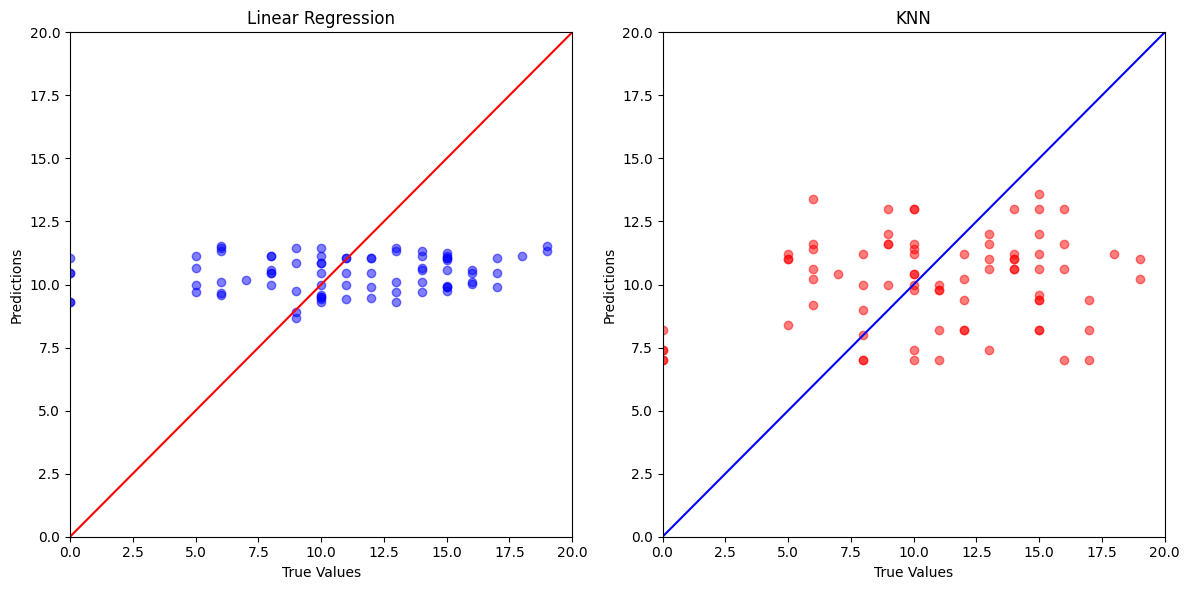

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# CSV 파일 경로
file_path = "/Users/yeomsangyoon/Visual Studio/0_tensor/source/student-mat.csv"

# CSV 파일을 데이터프레임으로 읽어오기
df = pd.read_csv(file_path, sep=",")

# 사용할 특성 선택
X = df[['age', 'absences']]  # 나이와 결석 횟수 특성을 이용하여 최종 성적인 G3와의 상관관계 예측.
y = df['G3']  # 예측할 값


# 사용할 특성 선택
X = df[['age', 'absences']]  # 나이와 결석 횟수 특성을 이용하여 최종 성적인 G3와의 상관관계 예측.
y = df['G3']  # 예측할 값

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# KNN 회귀 모델 생성 및 훈련
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측
linear_y_pred = linear_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)

# 선형 회귀 모델 및 KNN 모델의 MSE 계산
linear_mse = mean_squared_error(y_test, linear_y_pred)
knn_mse = mean_squared_error(y_test, knn_y_pred)

print("선형 회귀 모델의 MSE:", linear_mse)
print("KNN 모델의 MSE:", knn_mse)

# 산점도 시각화
plt.figure(figsize=(12, 6))

# 선형 회귀 모델의 산점도
plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_y_pred, color='blue', alpha=0.5)  # 실제값과 예측값의 분포를 나타내는 산점도
plt.plot([0, 20], [0, 20], color='red')  # 대각선 직선 추가 (예측이 완벽한 경우)
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim(0, 20)
plt.ylim(0, 20)

# KNN 모델의 산점도
plt.subplot(1, 2, 2)
plt.scatter(y_test, knn_y_pred, color='red', alpha=0.5)  # 실제값과 예측값의 분포를 나타내는 산점도
plt.plot([0, 20], [0, 20], color='blue')  # 대각선 직선 추가 (예측이 완벽한 경우)
plt.title('KNN')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim(0, 20)
plt.ylim(0, 20)

plt.tight_layout()
plt.show()
